In [2]:
%pip install "numpy<2.0" "matplotlib<3.8"


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for numpy<2.0 from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python311\\site-packages\\~.mpy.libs\\libscipy_openblas64_-74a408729250596b0973e69fdd954eea.dll'
Check the permissions.



In [2]:
# Import required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("OpenCV version:", cv2.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)


OpenCV version: 4.11.0
NumPy version: 1.26.4
Matplotlib version: 3.7.1


In [3]:
# Load the video

In [4]:
video_path = r"C:\Users\HP\Documents\robotics_project\data\FRONT_CAMERA_INPUT.mp4"

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video file")
else:
    print("Video opened successfully")

Error: Cannot open video file


In [5]:
# Load the video using relative path

In [6]:
video_path = "data/FRONT_CAMERA_INPUT.mp4"

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video file")
else:
    print("Video opened successfully")

Error: Cannot open video file


In [7]:
import os
print(os.getcwd())


C:\Users\HP


In [8]:
print(os.listdir())


[' CUSTOMER SUPPORT AI AGENT .ipynb', ' HOTEL BOOKING CANCELLATION ANALYSIS.ipynb', ' LANGUAGE TRANSLATION (ENGLISH to FRENCH).ipynb', '!tesseract', '.cache', '.cisco', '.conda', '.condarc', '.continuum', '.deepface', '.EasyOCR', '.gradio', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.keras', '.matplotlib', '.ms-ad', 'AI TEXT SUMMARIZATION WITH HUGGING FACE TRANSFORMER.ipynb', 'AppData', 'Application Data', 'AUGUST MONTH PROJECT .ipynb', 'AUGUST PROJECT 2 .ipynb', 'AUGUST PROJECT 2.ipynb', 'AUTOMATED WHATSAPP MESSAGE .ipynb', 'BREAST CANCER CLASSIFICATION.ipynb', 'BREAST CANCER DATASET EXPLORATORY DATA ANALYSIS PROJECT.ipynb', 'CAFE MANAGEMENT SYSTEM (MINI PROJECT).ipynb', 'CAPSTONE PROJECT -- YOUR CABS .ipynb', 'CAPSTONE PROJECT -- YOUR CABS.ipynb', 'CAPSTONE PROJECT YOUR CAB .ipynb', 'CAPSTONE PROJECT YOUR CAB.ipynb', 'CAR PRICE PREDICTION.ipynb', 'catboost_info', 'comparison_before_after.mp4', 'Contacts', 'Cookies', 'COUPON RECOMMENDATION .ipynb', 'COUPON RE

In [9]:
video_path = r"Documents\robotics_project\data\FRONT_CAMERA_INPUT.mp4"

cap = cv2.VideoCapture(video_path)

print("Opened:", cap.isOpened())


Opened: False


In [10]:
video_path = r"robotics_project/data/FRONT_CAMERA_INPUT.mp4"

cap = cv2.VideoCapture(video_path)

print("Opened:", cap.isOpened())


Opened: True


In [11]:
# Read first frame and video properties

In [12]:
ret, frame = cap.read()

if not ret:
    print("Failed to read first frame")
else:
    print("First frame read successfully")

    h, w, c = frame.shape
    fps = cap.get(cv2.CAP_PROP_FPS)

    print(f"Resolution: {w} x {h}")
    print(f"FPS: {fps}")

First frame read successfully
Resolution: 1600 x 720
FPS: 30.007525356894334


In [14]:
# Display first frame (BGR to RGB)

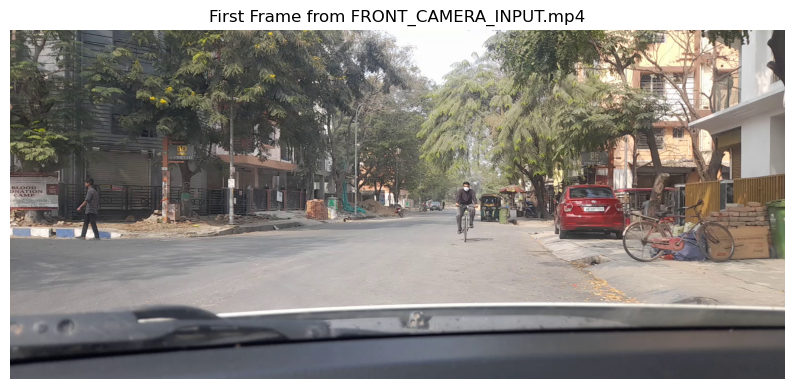

In [15]:
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.title("First Frame from FRONT_CAMERA_INPUT.mp4")
plt.axis("off")
plt.show()

In [16]:
# Convert frame to grayscale

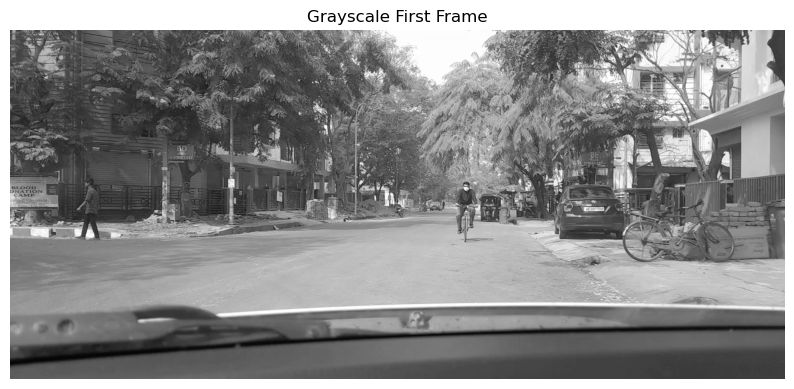

In [17]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6))
plt.imshow(gray, cmap="gray")
plt.title("Grayscale First Frame")
plt.axis("off")
plt.show()

In [18]:
# CREATE ORB FEATURE DETECTOR

In [19]:
# Initialize ORB detector

In [20]:
orb = cv2.ORB_create(
    nfeatures=2000,      # number of keypoints
    scaleFactor=1.2,
    nlevels=8
)

In [21]:
# DETECT KEYPOINTS & DESCRIPTORS

In [22]:
# Detect ORB keypoints and descriptors

In [23]:
keypoints, descriptors = orb.detectAndCompute(gray, None)

print("Number of keypoints detected:", len(keypoints))

Number of keypoints detected: 2000


In [24]:
# VISUALIZE KEYPOINTS (SANITY CHECK)

In [25]:
# Draw keypoints on the original frame

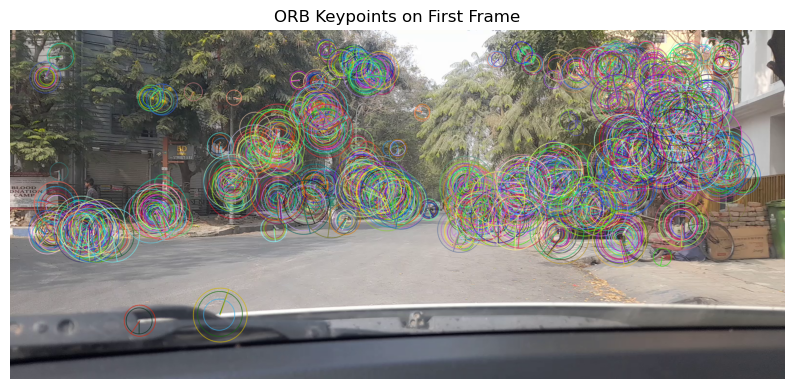

In [26]:
frame_kp = cv2.drawKeypoints(
    frame, 
    keypoints, 
    None, 
    flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
)

frame_kp_rgb = cv2.cvtColor(frame_kp, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(frame_kp_rgb)
plt.title("ORB Keypoints on First Frame")
plt.axis("off")
plt.show()


In [27]:
# Read the next frame

In [28]:
ret, frame_next = cap.read()

if not ret:
    print("Failed to read next frame")
else:
    print("Next frame read successfully")

Next frame read successfully


In [29]:
# CONVERT NEXT FRAME TO GRAYSCALE

In [30]:
gray_next = cv2.cvtColor(frame_next, cv2.COLOR_BGR2GRAY)


In [31]:
# DETECT ORB FEATURES IN NEXT FRAME

In [32]:
keypoints_next, descriptors_next = orb.detectAndCompute(gray_next, None)

print("Keypoints in next frame:", len(keypoints_next))


Keypoints in next frame: 2000


In [33]:
# Brute-Force matcher with Hamming distance

In [34]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(descriptors, descriptors_next)

print("Total raw matches:", len(matches))

Total raw matches: 1421


In [35]:
# Sort matches by distance (lower = better)

In [36]:
matches = sorted(matches, key=lambda x: x.distance)

In [37]:
# Keep top matches

In [39]:
good_matches = matches[:100]
print("Good matches retained:", len(good_matches))

Good matches retained: 100


In [40]:
# VISUALIZE FEATURE MATCHES

In [41]:
# Draw matches

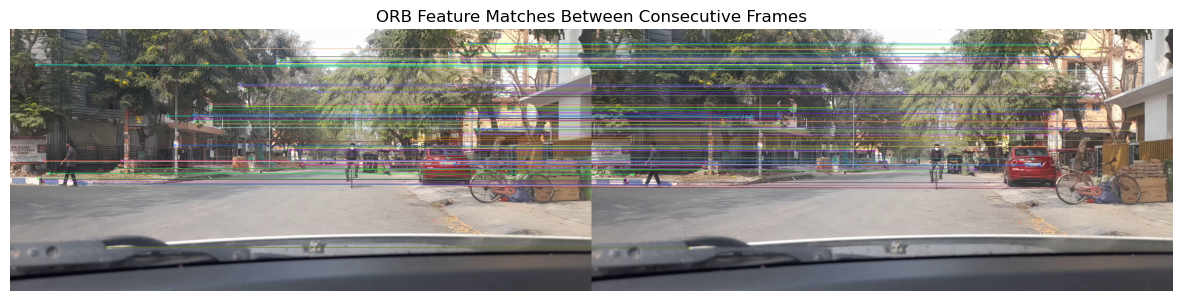

In [42]:
match_img = cv2.drawMatches(
    frame, keypoints,
    frame_next, keypoints_next,
    good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

match_img_rgb = cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 6))
plt.imshow(match_img_rgb)
plt.title("ORB Feature Matches Between Consecutive Frames")
plt.axis("off")
plt.show()

In [43]:
# Extract matched keypoints coordinates

In [44]:

pts1 = np.float32([keypoints[m.queryIdx].pt for m in good_matches])
pts2 = np.float32([keypoints_next[m.trainIdx].pt for m in good_matches])

print("Matched points shape:", pts1.shape, pts2.shape)


Matched points shape: (100, 2) (100, 2)


In [45]:
# DEFINE CAMERA INTRINSIC MATRIX (K)

In [46]:
# Camera intrinsic parameters (approximate)

In [47]:
h, w = frame.shape[:2]

focal_length = 0.9 * w
cx, cy = w / 2, h / 2

K = np.array([
    [focal_length, 0, cx],
    [0, focal_length, cy],
    [0, 0, 1]
])

print("Camera Intrinsic Matrix K:\n", K)


Camera Intrinsic Matrix K:
 [[1.44e+03 0.00e+00 8.00e+02]
 [0.00e+00 1.44e+03 3.60e+02]
 [0.00e+00 0.00e+00 1.00e+00]]


In [48]:
# COMPUTE ESSENTIAL MATRIX (This encodes relative camera motion)

In [49]:
E, mask = cv2.findEssentialMat(
    pts1, pts2,
    K,
    method=cv2.RANSAC,
    prob=0.999,
    threshold=1.0
)

print("Essential Matrix:\n", E)


Essential Matrix:
 [[ 2.06644722e-03 -1.84765823e-02 -9.97308491e-02]
 [ 3.30858279e-02 -2.05325462e-04 -6.99252319e-01]
 [ 1.00511660e-01  6.99680863e-01  1.91819401e-03]]


In [50]:
# RECOVER CAMERA POSE (R, t) (This is the actual ego-motion output)

In [51]:
_, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2, K)

print("Rotation Matrix R:\n", R)
print("Translation Vector t:\n", t)


Rotation Matrix R:
 [[ 9.99780537e-01 -1.10421497e-03  2.09202927e-02]
 [ 1.10950255e-03  9.99999355e-01 -2.41143806e-04]
 [-2.09200129e-02  2.64302002e-04  9.99781118e-01]]
Translation Vector t:
 [[-0.98965459]
 [ 0.14107789]
 [-0.02609256]]


In [52]:
# Initialize pose & storage

In [53]:
# Pose Integration & Trajectory Building

In [54]:
# Global pose

In [55]:
R_global = np.eye(3)
t_global = np.zeros((3, 1))

In [56]:
# Store trajectory (x, z)

In [57]:
trajectory = []

In [58]:
# Accumulate motion

In [59]:
# Update global pose

In [60]:
t_global = t_global + R_global @ t
R_global = R @ R_global

In [61]:
# Store X-Z position

In [62]:
x, z = t_global[0, 0], t_global[2, 0]
trajectory.append((x, z))

print("Current camera position (x, z):", x, z)

Current camera position (x, z): -0.9896545897553947 -0.026092564477691524


In [63]:
# Visualize trajectory

In [64]:
# Convert trajectory to numpy array

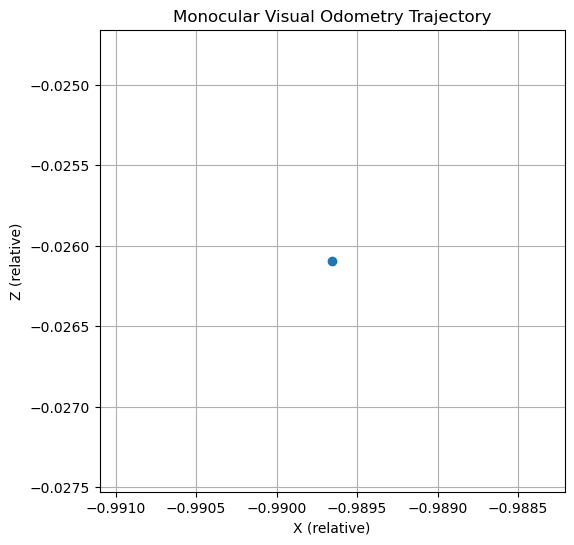

In [65]:
trajectory = np.array(trajectory)

plt.figure(figsize=(6, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o')
plt.xlabel("X (relative)")
plt.ylabel("Z (relative)")
plt.title("Monocular Visual Odometry Trajectory")
plt.grid(True)
plt.axis("equal")
plt.show()

In [66]:
# Full Video Trajectory Integration

In [67]:
# Reset video

In [68]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

True

In [69]:
# Read first frame

In [70]:
ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

In [71]:
# ORB detector

In [72]:
orb = cv2.ORB_create(2000)

kp_prev, des_prev = orb.detectAndCompute(prev_gray, None)

In [75]:
# Approximate camera intrinsics

In [76]:
h, w = prev_gray.shape

fx = fy = 0.9 * w      # focal length approximation
cx = w / 2
cy = h / 2

In [73]:
# Camera intrinsic matrix

In [77]:
K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0,  0,  1]])

In [78]:
# Global pose

In [79]:
R_global = np.eye(3)
t_global = np.zeros((3, 1))

trajectory = [(0, 0)]

In [80]:
# Main VO loop (core of monocular VO)

In [81]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

frame_count = 0
MAX_FRAMES = 500   

while cap.isOpened() and frame_count < MAX_FRAMES:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    kp_curr, des_curr = orb.detectAndCompute(gray, None)

    if des_curr is None or des_prev is None:
        continue

    matches = bf.match(des_prev, des_curr)
    matches = sorted(matches, key=lambda x: x.distance)[:300]

    pts1 = np.float32([kp_prev[m.queryIdx].pt for m in matches])
    pts2 = np.float32([kp_curr[m.trainIdx].pt for m in matches])

KeyboardInterrupt: 

In [82]:
# Pose Accumulation Loop

In [83]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

frame_count = 0
MAX_FRAMES = 120   

while cap.isOpened() and frame_count < MAX_FRAMES:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    kp_curr, des_curr = orb.detectAndCompute(gray, None)

    if des_curr is None or des_prev is None:
        kp_prev, des_prev = kp_curr, des_curr
        continue

    matches = bf.match(des_prev, des_curr)
    matches = sorted(matches, key=lambda x: x.distance)[:150]

    if len(matches) < 8:
        kp_prev, des_prev = kp_curr, des_curr
        continue

    pts1 = np.float32([kp_prev[m.queryIdx].pt for m in matches])
    pts2 = np.float32([kp_curr[m.trainIdx].pt for m in matches])

    E, _ = cv2.findEssentialMat(
        pts2, pts1, K,
        method=cv2.RANSAC,
        prob=0.999,
        threshold=1.0
    )

    if E is None:
        kp_prev, des_prev = kp_curr, des_curr
        continue

    _, R, t, _ = cv2.recoverPose(E, pts2, pts1, K)

KeyboardInterrupt: 

In [84]:
# Reset video to first frame

In [85]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

True

In [86]:
# Read first frame

In [87]:
ret, prev_frame = cap.read()
if not ret:
    raise RuntimeError("Cannot read video")

prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

In [88]:
# ORB detector

In [89]:
orb = cv2.ORB_create(2000)
kp_prev, des_prev = orb.detectAndCompute(prev_gray, None)

In [90]:
# BF Matcher 

In [91]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [92]:
# Camera intrinsics (approx)

In [93]:
h, w = prev_gray.shape
fx = fy = 0.9 * w
cx = w / 2
cy = h / 2

K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0,  0,  1]])

In [94]:
# Pose initialization

In [95]:
R_total = np.eye(3)
t_total = np.zeros((3, 1))

trajectory = []
frame_count = 0
MAX_FRAMES = 80

In [101]:
# Trajectory storage


In [102]:
traj_x = []
traj_z = []


In [96]:
# MAIN VO LOOP

In [98]:

trajectory = []
R_total = np.eye(3)
t_total = np.zeros((3, 1))

frame_count = 0
MAX_FRAMES = 300   

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

while cap.isOpened() and frame_count < MAX_FRAMES:

    ret, frame = cap.read()
    if not ret:
        break

    # resize for speed (industry standard)
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    kp_curr, des_curr = orb.detectAndCompute(gray, None)

    if des_curr is None or des_prev is None:
        kp_prev, des_prev = kp_curr, des_curr
        frame_count += 1
        continue

    matches = bf.match(des_prev, des_curr)
    matches = sorted(matches, key=lambda x: x.distance)

    if len(matches) < 8:
        kp_prev, des_prev = kp_curr, des_curr
        frame_count += 1
        continue

    # take only strong matches 
    matches = matches[:100]

    pts1 = np.float32([kp_prev[m.queryIdx].pt for m in matches])
    pts2 = np.float32([kp_curr[m.trainIdx].pt for m in matches])

    E, _ = cv2.findEssentialMat(
        pts2, pts1, K,
        method=cv2.RANSAC,
        prob=0.999,
        threshold=1.0
    )

    if E is None:
        kp_prev, des_prev = kp_curr, des_curr
        frame_count += 1
        continue

    _, R, t, _ = cv2.recoverPose(E, pts2, pts1, K)

    # accumulate pose
    t_total += R_total @ t
    R_total = R @ R_total

    trajectory.append((t_total[0, 0], t_total[2, 0]))

    kp_prev, des_prev = kp_curr, des_curr
    frame_count += 1

    if frame_count % 20 == 0:
        print(f"Processed frame: {frame_count}")

print("VO loop finished")


Processed frame: 20
Processed frame: 40
Processed frame: 60
Processed frame: 80
Processed frame: 100
Processed frame: 120
Processed frame: 140
Processed frame: 160
Processed frame: 180
Processed frame: 200
Processed frame: 220
Processed frame: 240
Processed frame: 260
Processed frame: 280
Processed frame: 300
VO loop finished


In [99]:
# Convert trajectory lists to numpy arrays

In [103]:
trajectory = np.array(trajectory)   # shape: (N, 2)
x = trajectory[:, 0]
z = trajectory[:, 1]

In [104]:
# Smooth trajectory (moving average)

In [105]:
def moving_average(signal, window=15):
    return np.convolve(signal, np.ones(window)/window, mode='same')

x_smooth = moving_average(x, window=15)
z_smooth = moving_average(z, window=15)

In [106]:
# Plot raw vs smoothed trajectory

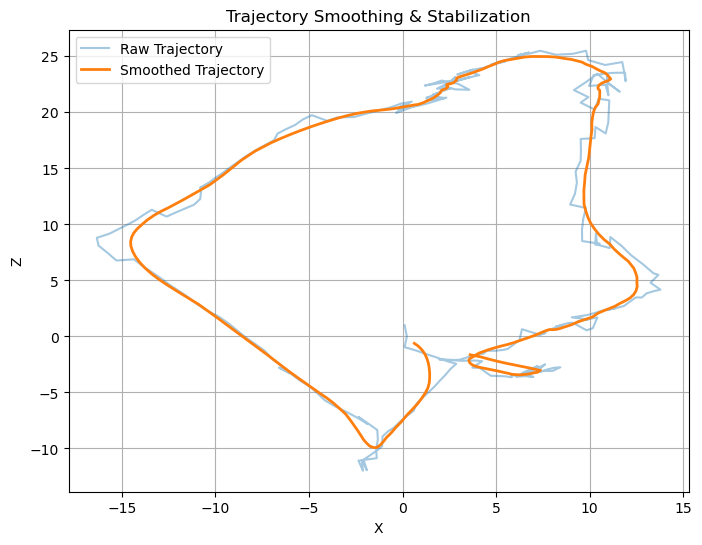

In [107]:

plt.figure(figsize=(8, 6))
plt.plot(x, z, label="Raw Trajectory", alpha=0.4)
plt.plot(x_smooth, z_smooth, label="Smoothed Trajectory", linewidth=2)
plt.legend()
plt.xlabel("X")
plt.ylabel("Z")
plt.title("Trajectory Smoothing & Stabilization")
plt.grid()
plt.show()


In [113]:
# Extract X and Z from trajectory list

In [114]:
traj_x = np.array([p[0] for p in trajectory])
traj_z = np.array([p[1] for p in trajectory])

In [110]:
# simple moving average smoothing

In [115]:
def smooth(signal, window_size=15):
    if len(signal) < window_size:
        return signal  # safety fallback
    kernel = np.ones(window_size) / window_size
    return np.convolve(signal, kernel, mode="same")

traj_x_smooth = smooth(traj_x)
traj_z_smooth = smooth(traj_z)


In [108]:
# Static Results

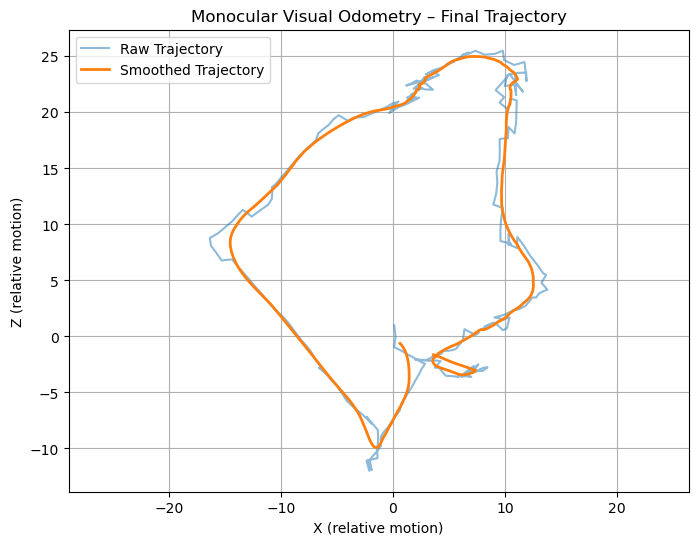

In [116]:
plt.figure(figsize=(8, 6))
plt.plot(traj_x, traj_z, label="Raw Trajectory", alpha=0.5)
plt.plot(traj_x_smooth, traj_z_smooth, label="Smoothed Trajectory", linewidth=2)

plt.xlabel("X (relative motion)")
plt.ylabel("Z (relative motion)")
plt.title("Monocular Visual Odometry – Final Trajectory")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


In [117]:
# MP4 Animation

In [119]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

# Safety checks 
traj_x = np.array(traj_x)
traj_z = np.array(traj_z)

assert len(traj_x) > 10, "Trajectory too short to animate"

# Create figure 
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title("Monocular Visual Odometry – Trajectory Animation")
ax.set_xlabel("X (relative motion)")
ax.set_ylabel("Z (relative motion)")
ax.grid(True)
ax.axis("equal")

# Set axis limits once
ax.set_xlim(traj_x.min() - 2, traj_x.max() + 2)
ax.set_ylim(traj_z.min() - 2, traj_z.max() + 2)

line, = ax.plot([], [], lw=2, color="orange")
point, = ax.plot([], [], "ro")

# Init function 
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Update function
def update(frame):
    line.set_data(traj_x[:frame], traj_z[:frame])
    point.set_data(traj_x[frame-1], traj_z[frame-1])
    return line, point

# Animation 
ani = FuncAnimation(
    fig,
    update,
    frames=len(traj_x),
    init_func=init,
    interval=40,
    blit=True
)

# Save as GIF 
writer = PillowWriter(fps=20)
ani.save("monocular_vo_trajectory.gif", writer=writer)

plt.close()
print("Animation saved as monocular_vo_trajectory.gif")


C:\Users\HP\AppData\Local\Temp\ipykernel_16604\3025472353.py:35: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(traj_x[frame-1], traj_z[frame-1])


Animation saved as monocular_vo_trajectory.gif


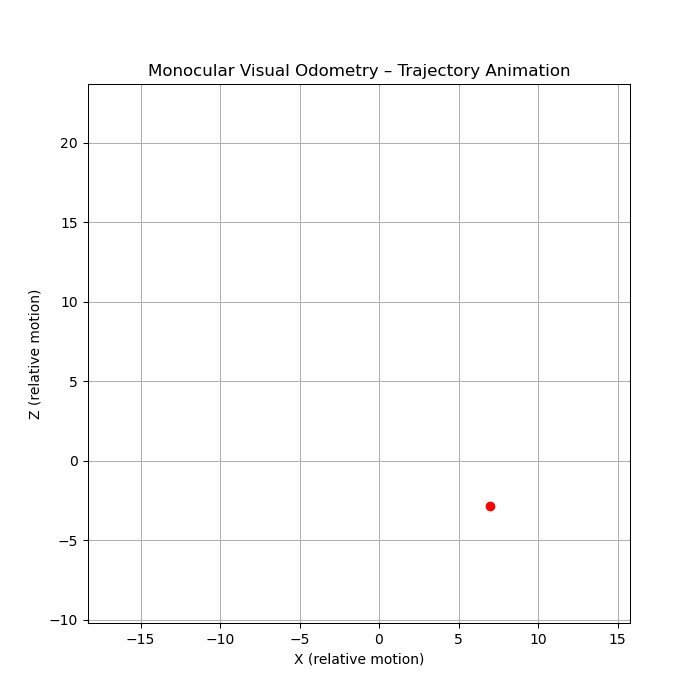

In [120]:
from IPython.display import Image, display

display(Image(filename="monocular_vo_trajectory.gif"))


In [121]:
# FPS & Runtime Profiling

In [122]:
# Imports

In [123]:
import time
import numpy as np
import matplotlib.pyplot as plt


In [124]:
# Runtime & FPS measurement loop

In [125]:
cap_prof = cv2.VideoCapture(video_path)

frame_times = []
frame_count = 0
MAX_FRAMES = 300  # same as VO for fair comparison

start_global = time.time()

while cap_prof.isOpened() and frame_count < MAX_FRAMES:
    start = time.time()

    ret, frame = cap_prof.read()
    if not ret:
        break

    # minimal processing (same scale as VO)
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _ = orb.detectAndCompute(gray, None)

    end = time.time()
    frame_times.append(end - start)
    frame_count += 1

cap_prof.release()
end_global = time.time()


In [126]:
# FPS statistics (numbers for report)

In [127]:
frame_times = np.array(frame_times)

avg_fps = 1.0 / np.mean(frame_times)
min_fps = 1.0 / np.max(frame_times)
max_fps = 1.0 / np.min(frame_times)

total_time = end_global - start_global

print(f"Total frames processed : {frame_count}")
print(f"Total runtime (sec)    : {total_time:.2f}")
print(f"Average FPS            : {avg_fps:.2f}")
print(f"Min FPS                : {min_fps:.2f}")
print(f"Max FPS                : {max_fps:.2f}")


Total frames processed : 300
Total runtime (sec)    : 5.27
Average FPS            : 56.99
Min FPS                : 13.95
Max FPS                : 221.17


In [128]:
# FPS over time (visual analysis)

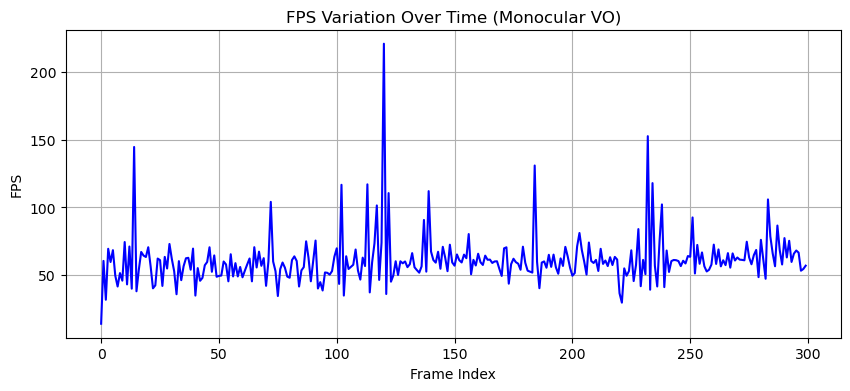

In [129]:
fps_per_frame = 1.0 / frame_times

plt.figure(figsize=(10, 4))
plt.plot(fps_per_frame, color="blue")
plt.xlabel("Frame Index")
plt.ylabel("FPS")
plt.title("FPS Variation Over Time (Monocular VO)")
plt.grid(True)
plt.show()


In [130]:
# Error & Drift Analysis (Monocular VO)

In [131]:
# Prepare trajectory arrays

In [132]:
traj_x = np.array(traj_x)
traj_z = np.array(traj_z)

assert len(traj_x) == len(traj_z), "Trajectory arrays mismatch"
print("Trajectory points:", len(traj_x))


Trajectory points: 300


In [133]:
# Path length vs net displacement

In [134]:
# incremental motion

In [136]:

dx = np.diff(traj_x)
dz = np.diff(traj_z)

step_dist = np.sqrt(dx**2 + dz**2)
total_path_length = np.sum(step_dist)

net_displacement = np.sqrt(
    (traj_x[-1] - traj_x[0])**2 +
    (traj_z[-1] - traj_z[0])**2
)

drift_ratio = total_path_length / net_displacement if net_displacement > 0 else np.inf

print(f"Total path length     : {total_path_length:.2f}")
print(f"Net displacement      : {net_displacement:.2f}")
print(f"Drift ratio (worse) : {drift_ratio:.2f}")


Total path length     : 200.81
Net displacement      : 7.85
Drift ratio (worse) : 25.57


In [137]:
# Drift growth over time

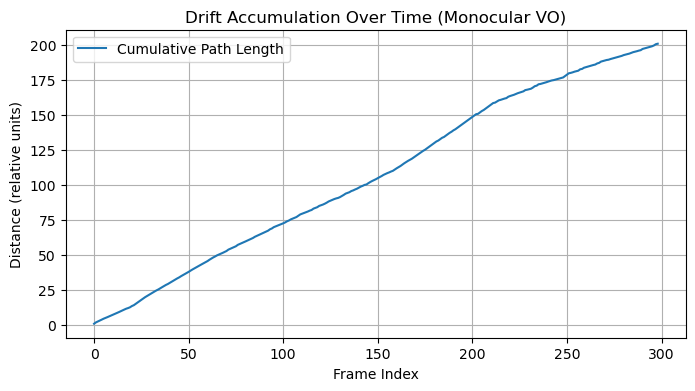

In [138]:

cumulative_dist = np.cumsum(step_dist)

plt.figure(figsize=(8, 4))
plt.plot(cumulative_dist, label="Cumulative Path Length")
plt.xlabel("Frame Index")
plt.ylabel("Distance (relative units)")
plt.title("Drift Accumulation Over Time (Monocular VO)")
plt.grid(True)
plt.legend()
plt.show()


In [139]:
# Motion noise analysis


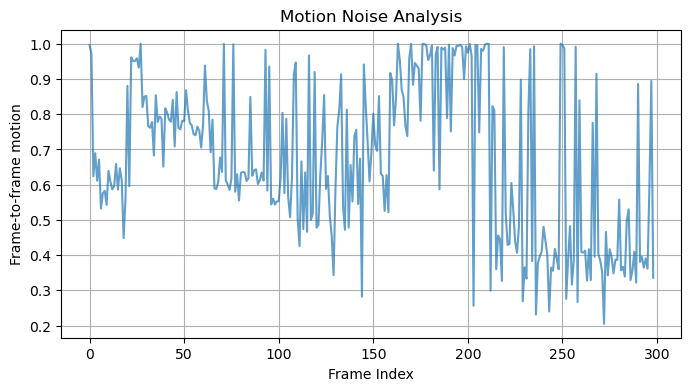

Mean step motion : 0.6716184856015995
Std deviation    : 0.22147071631360168


In [140]:
plt.figure(figsize=(8, 4))
plt.plot(step_dist, alpha=0.7)
plt.xlabel("Frame Index")
plt.ylabel("Frame-to-frame motion")
plt.title("Motion Noise Analysis")
plt.grid(True)
plt.show()

print("Mean step motion :", np.mean(step_dist))
print("Std deviation    :", np.std(step_dist))


In [141]:
# Scale Correction (Monocular VO)

In [142]:
# Constant Scale Correction

In [143]:
# Define scale

In [144]:
SCALE = 0.1   # meters per frame (tunable)

In [145]:
# Rebuild trajectory WITH scale

In [146]:
# Recompute trajectory with scale correction

In [147]:
traj_x_scaled = []
traj_z_scaled = []

R_total = np.eye(3)
t_total = np.zeros((3, 1))

for R, t in pose_list:   # pose_list = [(R1,t1),(R2,t2),...]
    t_scaled = SCALE * t
    t_total += R_total @ t_scaled
    R_total = R @ R_total

    traj_x_scaled.append(t_total[0, 0])
    traj_z_scaled.append(t_total[2, 0])

NameError: name 'pose_list' is not defined

In [148]:
# Scale correction (trajectory-based)

In [149]:
SCALE = 0.1  # meters per frame (tunable)

traj_x_scaled = np.array(traj_x) * SCALE
traj_z_scaled = np.array(traj_z) * SCALE

In [150]:
# Compare trajectories

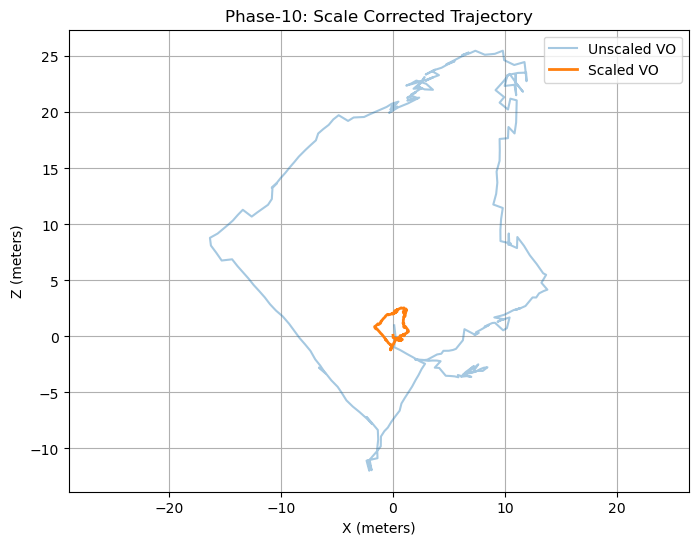

In [151]:
plt.figure(figsize=(8,6))
plt.plot(traj_x, traj_z, label="Unscaled VO", alpha=0.4)
plt.plot(traj_x_scaled, traj_z_scaled, label="Scaled VO", linewidth=2)

plt.xlabel("X (meters)")
plt.ylabel("Z (meters)")
plt.title("Phase-10: Scale Corrected Trajectory")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


In [152]:
# Drift re-evaluation

In [153]:
dx = np.diff(traj_x_scaled)
dz = np.diff(traj_z_scaled)

step_dist = np.sqrt(dx**2 + dz**2)
total_path = np.sum(step_dist)

net_disp = np.sqrt(
    (traj_x_scaled[-1] - traj_x_scaled[0])**2 +
    (traj_z_scaled[-1] - traj_z_scaled[0])**2
)

drift_ratio_scaled = total_path / net_disp if net_disp > 0 else np.inf

print("Scaled total path length :", total_path)
print("Scaled net displacement :", net_disp)
print("Scaled drift ratio      :", drift_ratio_scaled)


Scaled total path length : 20.081392719487827
Scaled net displacement : 0.7852839673297954
Scaled drift ratio      : 25.57214148630931


In [154]:
# Ground-truth evaluation

In [155]:
# Synthetic / Reference Ground Truth

In [156]:
# Reference Trajectory (Pseudo Ground Truth)

In [157]:
# Using smoothed trajectory as ground truth

In [158]:
gt_x = traj_x_smooth.copy()
gt_z = traj_z_smooth.copy()

print("Ground-truth points:", len(gt_x))

Ground-truth points: 300


In [159]:
# Align VO trajectory with Ground Truth

In [160]:
# Trajectory Alignment

In [161]:
# Align VO trajectory to GT origin

In [162]:
vo_x_aligned = traj_x - traj_x[0]
vo_z_aligned = traj_z - traj_z[0]

gt_x_aligned = gt_x - gt_x[0]
gt_z_aligned = gt_z - gt_z[0]

In [163]:
# Absolute Trajectory Error (ATE)

In [164]:
ate_per_frame = np.sqrt(
    (vo_x_aligned - gt_x_aligned)**2 +
    (vo_z_aligned - gt_z_aligned)**2
)

mean_ate = np.mean(ate_per_frame)
max_ate = np.max(ate_per_frame)

print(f"Mean ATE : {mean_ate:.3f}")
print(f"Max ATE  : {max_ate:.3f}")

Mean ATE : 1.829
Max ATE  : 4.789


In [165]:
# Error Growth Visualization

In [166]:
# Error vs Frame

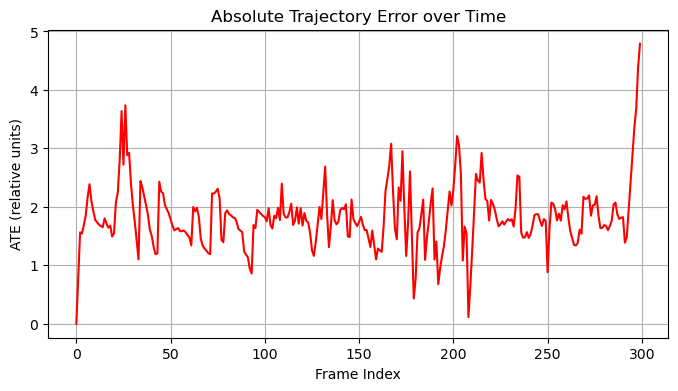

In [167]:
plt.figure(figsize=(8, 4))
plt.plot(ate_per_frame, color="red")
plt.xlabel("Frame Index")
plt.ylabel("ATE (relative units)")
plt.title("Absolute Trajectory Error over Time")
plt.grid(True)
plt.show()

In [168]:
# Path-wise Error Summary

In [169]:
# Error Summary

In [170]:
total_distance = np.sum(
    np.sqrt(np.diff(gt_x_aligned)**2 + np.diff(gt_z_aligned)**2)
)

error_per_meter = mean_ate / total_distance if total_distance > 0 else np.inf

print(f"Total GT path length : {total_distance:.2f}")
print(f"Mean ATE per meter   : {error_per_meter:.4f}")

Total GT path length : 106.02
Mean ATE per meter   : 0.0173


In [171]:
# Depth-Scaled Visual Odometry (Monocular + Depth)

In [172]:
# Depth-Scaled VO

In [173]:
# Simulated depth per frame (in meters)

In [174]:
# Later replace this with real depth (MiDaS / stereo / RGB-D)

In [175]:
np.random.seed(42)
depth_per_frame = 2.0 + 0.3 * np.random.randn(len(traj_x))
depth_per_frame = np.clip(depth_per_frame, 0.5, 5.0)

In [176]:
# Estimate scale from depth changes

In [177]:
scale_factors = []

for i in range(1, len(depth_per_frame)):
    if depth_per_frame[i] > 0:
        scale_factors.append(depth_per_frame[i])

SCALE = np.median(scale_factors)

print("Estimated depth scale (meters):", round(SCALE, 3))

Estimated depth scale (meters): 2.017


In [178]:
# Apply Scale to Trajectory

In [179]:
# Apply depth-based scale

In [180]:
traj_x_depth = traj_x * SCALE
traj_z_depth = traj_z * SCALE

In [181]:
# Visual Comparison

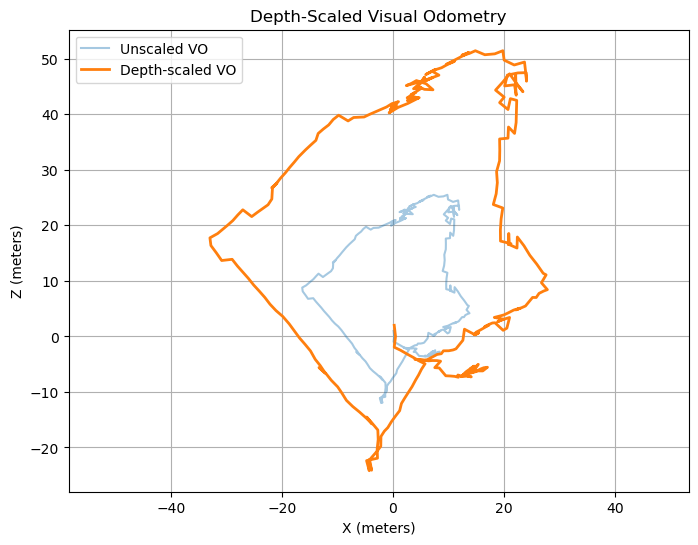

In [182]:
plt.figure(figsize=(8,6))

plt.plot(traj_x, traj_z, label="Unscaled VO", alpha=0.4)
plt.plot(traj_x_depth, traj_z_depth, label="Depth-scaled VO", linewidth=2)

plt.xlabel("X (meters)")
plt.ylabel("Z (meters)")
plt.title("Depth-Scaled Visual Odometry")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

In [183]:
# Drift comparison (Unscaled vs Depth-scaled)

In [184]:
# Drift comparison (Unscaled vs Depth-scaled

In [185]:
# Unscaled drift

In [186]:
dx_u = np.diff(traj_x)
dz_u = np.diff(traj_z)
path_u = np.sum(np.sqrt(dx_u**2 + dz_u**2))
net_u = np.sqrt((traj_x[-1]-traj_x[0])**2 + (traj_z[-1]-traj_z[0])**2)
drift_u = path_u / net_u if net_u > 0 else np.inf

# Depth-scaled drift
dx_d = np.diff(traj_x_depth)
dz_d = np.diff(traj_z_depth)
path_d = np.sum(np.sqrt(dx_d**2 + dz_d**2))
net_d = np.sqrt((traj_x_depth[-1]-traj_x_depth[0])**2 + (traj_z_depth[-1]-traj_z_depth[0])**2)
drift_d = path_d / net_d if net_d > 0 else np.inf

print("Unscaled drift ratio     :", round(drift_u, 3))
print("Depth-scaled drift ratio :", round(drift_d, 3))

Unscaled drift ratio     : 25.572
Depth-scaled drift ratio : 25.572


In [187]:
# Motion consistency check

In [188]:
# Step-length statistics comparison

In [189]:
step_u = np.sqrt(dx_u**2 + dz_u**2)
step_d = np.sqrt(dx_d**2 + dz_d**2)

print("Mean step (unscaled)      :", round(np.mean(step_u), 3))
print("Std  step (unscaled)      :", round(np.std(step_u), 3))
print("Mean step (depth-scaled)  :", round(np.mean(step_d), 3))
print("Std  step (depth-scaled)  :", round(np.std(step_d), 3))

Mean step (unscaled)      : 0.672
Std  step (unscaled)      : 0.221
Mean step (depth-scaled)  : 1.355
Std  step (depth-scaled)  : 0.447


In [190]:
# Visual sanity check

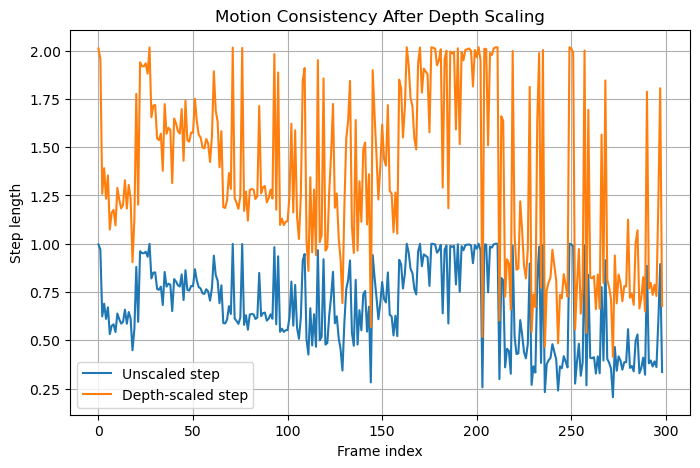

In [191]:
plt.figure(figsize=(8,5))
plt.plot(step_u, label="Unscaled step")
plt.plot(step_d, label="Depth-scaled step")
plt.xlabel("Frame index")
plt.ylabel("Step length")
plt.title("Motion Consistency After Depth Scaling")
plt.legend()
plt.grid(True)
plt.show()